In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re

In [ ]:
df = pd.read_csv('data.csv')
df = df.drop(columns='Unnamed: 0')

In [ ]:
X_egg = pd.read_csv('x_egg_car.csv')

In [ ]:
df = df.drop(['1. Start a conversation with a stranger', '2. Make sure others are comfortable', '3. Create things', '4. Plan in advance', '5. Feel depressed', '6. Plan events', '7. Insult people',
              '8. Think about spirituality', '9. Let thяings get messy', '10. Feel worried', '11. Use difficult words', '12. Sympathize with others'], axis=1)
df

,Ch1_Mean,Ch1_Std Dev,Ch1_Theta Power,Ch1_Alpha Power,Ch1_Beta Power,Ch1_Gamma Power,Ch2_Mean,Ch2_Std Dev,Ch2_Theta Power,Ch2_Alpha Power,...,3. Create things,4. Plan in advance,5. Feel depressed,6. Plan events,7. Insult people,8. Think about spirituality,9. Let things get messy,10. Feel worried,11. Use difficult words,12. Sympathize with others
0,-0.007856,12.848280,6.376499,2.953373,1.182572,0.902507,0.032383,13.196769,5.805588,2.605096,...,1,3,2,3,4,1,2,4,1,4
1,-0.029390,15.368111,10.126835,3.402572,1.055245,0.734178,-0.100979,17.402255,11.545784,3.135453,...,1,3,2,3,4,1,2,4,1,4
2,0.006996,16.017913,11.412445,3.818720,1.069875,0.635234,0.101066,19.616918,12.825493,3.197154,...,1,3,2,3,4,1,2,4,1,4
3,-0.027253,16.642966,9.899070,3.429128,0.973598,0.681272,-0.038493,18.239224,10.016335,2.955328,...,1,3,2,3,4,1,2,4,1,4
4,-0.018234,11.732200,6.696972,2.959700,0.806932,0.467701,-0.031063,14.720739,8.055340,2.666162,...,1,3,2,3,4,1,2,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,0.093502,16.977695,10.024260,4.188634,0.921608,0.563430,0.124918,17.093031,7.998522,3.265881,...,1,4,4,2,5,4,1,4,2,5
678,0.051983,22.143175,21.379737,10.710927,1.022601,0.392993,0.067005,19.821881,15.314154,6.700195,...,1,4,4,2,5,4,1,4,2,5
679,-0.026329,18.029723,15.205692,12.050139,0.950048,0.386221,-0.056839,17.260305,10.613487,6.716624,...,1,4,4,2,5,4,1,4,2,5
680,-0.013981,20.094219,13.989340,8.056362,0.902629,0.408105,0.025374,20.297761,11.081365,5.807567,...,1,4,4,2,5,4,1,4,2,5


In [ ]:
df.to_csv('data.csv', index=False)

In [ ]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [ ]:
X_egg = df.drop(['1. Start a conversation with a stranger', '2. Make sure others are comfortable', '3. Create things', '4. Plan in advance', '5. Feel depressed', '6. Plan events', '7. Insult people',
              '8. Think about spirituality', '9. Let things get messy', '10. Feel worried', '11. Use difficult words', '12. Sympathize with others'], axis=1)

In [ ]:
y_valence = pd.read_csv("valence.csv")  # валентність
y_arousal = pd.read_csv("arousal.csv")  # збудженість
y_emotion = pd.read_csv("emotion.csv")  # емоція

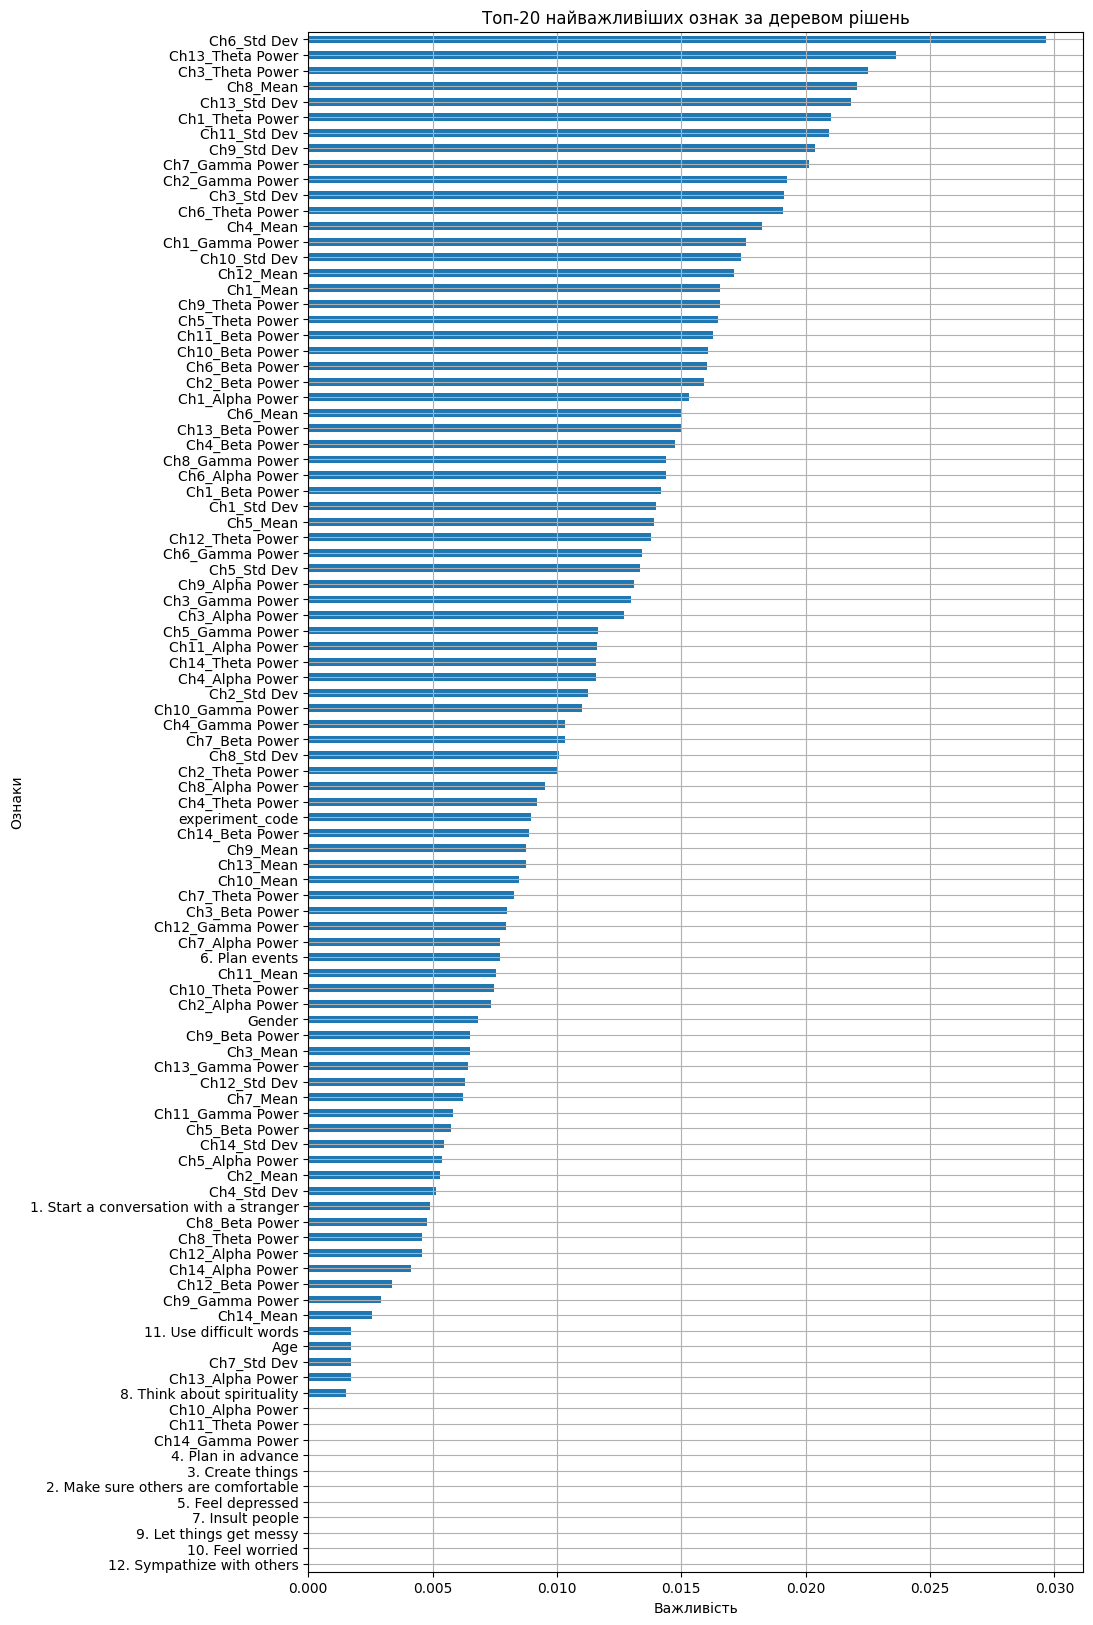

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(df, y_valence.values.ravel())

feature_importances = model.feature_importances_

important_features = pd.Series(feature_importances, index=df.columns)

important_features_sorted = important_features.sort_values(ascending=False)

plt.figure(figsize=(10, 20))
important_features_sorted.plot(kind='barh')
plt.title('Топ-20 найважливіших ознак за деревом рішень')
plt.gca().invert_yaxis()
plt.xlabel('Важливість')
plt.ylabel('Ознаки')
plt.grid(True)
plt.show()


In [ ]:
# розділення на тренувальні та тестові дані X_filtered, y_valence.values.ravel()
X_train_valence, X_test_valence, y_train_valence, y_test_valence = train_test_split(X_filtered, y_valence, test_size=0.2, random_state=42)
X_train_arousal, X_test_arousal, y_train_arousal, y_test_arousal = train_test_split(X_egg, y_arousal, test_size=0.2, random_state=42)
X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(X_egg, y_emotion, test_size=0.2, random_state=42)

In [ ]:
ex_model_v = ExtraTreesClassifier(n_estimators=1005,
                                    criterion='entropy',
                                    max_depth=None,
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    # max_features='sqrt',
                                    max_leaf_nodes=None,
                                    #oob_score=True,
                                    random_state=50,
                                    class_weight=None
                                    )
ex_model_v.fit(X_train_valence, y_train_valence)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesClassifier(criterion='entropy', min_samples_split=5,
                     n_estimators=1005, random_state=50)

In [ ]:
y_pred_valence = ex_model_v.predict(X_test_valence)

In [ ]:
def evaluate_model(y_true, y_pred, average='micro'):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    # print("Precision:", precision_score(y_true, y_pred, average=average, zero_division=0))
    # print("Recall:", recall_score(y_true, y_pred, average=average, zero_division=0))
    # print("F1 Score:", f1_score(y_true, y_pred, average=average, zero_division=0))
    print("Classification Report:\n", classification_report(y_true, y_pred, digits=4, zero_division=0))

In [ ]:
на даних з усіма опитувальниками

In [ ]:
print("\nVALENCE\nextratrees\n")
evaluate_model(y_test_valence, y_pred_valence)


VALENCE
extratrees

Accuracy: 0.2116788321167883
Classification Report:
               precision    recall  f1-score   support

           1     0.1333    0.2222    0.1667         9
           2     0.1667    0.1304    0.1463        23
           3     0.2727    0.3103    0.2903        29
           4     0.2308    0.3600    0.2812        25
           5     0.1250    0.0952    0.1081        21
           6     0.1429    0.0833    0.1053        12
           7     0.0000    0.0000    0.0000         7
           8     0.3333    0.3000    0.3158        10
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.2117       137
   macro avg     0.1561    0.1668    0.1571       137
weighted avg     0.1926    0.2117    0.1971       137



In [ ]:
на даних з віком, статю та номером людини

In [ ]:
print("\nVALENCE\nextratrees\n")
evaluate_model(y_test_valence, y_pred_valence)


VALENCE
extratrees

Accuracy: 0.23357664233576642
Classification Report:
               precision    recall  f1-score   support

           1     0.1667    0.2222    0.1905         9
           2     0.1500    0.1304    0.1395        23
           3     0.3077    0.4138    0.3529        29
           4     0.2500    0.4000    0.3077        25
           5     0.1250    0.0952    0.1081        21
           6     0.1429    0.0833    0.1053        12
           7     0.0000    0.0000    0.0000         7
           8     0.6667    0.2000    0.3077        10
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.2336       137
   macro avg     0.2010    0.1717    0.1680       137
weighted avg     0.2272    0.2336    0.2150       137



In [ ]:
ps = pd.read_csv("personality_scores_NPA.csv")

print(ps[column].unique())

['Medium-High' 'Low-Medium' 'High' 'Low']


In [ ]:
ps['Extraversion'] = ps['Extraversion'].map({'Low': 0, 'Low-Medium': 1, 'Medium-High': 2, 'High': 3})
ps['Neuroticism'] = ps['Neuroticism'].map({'Low': 0, 'Low-Medium': 1, 'Medium-High': 2, 'High': 3})
ps['Conscientiousness'] = ps['Conscientiousness'].map({'Low': 0, 'Low-Medium': 1, 'Medium-High': 2, 'High': 3})
ps['Agreeableness'] = ps['Agreeableness'].map({'Low': 0, 'Low-Medium': 1, 'Medium-High': 2, 'High': 3})
ps['Openness to Experience'] = ps['Openness to Experience'].map({'Low': 0, 'Low-Medium': 1, 'Medium-High': 2, 'High': 3})

In [ ]:
# ps = ps.drop(['SUB'], axis=1)
ps

,SUB,Extraversion,Neuroticism,Conscientiousness,Agreeableness,Openness to Experience
0,1,2,1,1,0,0
1,2,1,1,1,0,1
2,3,2,0,1,1,0
3,4,2,0,1,1,0
4,5,3,1,1,1,0
5,6,1,0,2,1,0
6,7,2,1,2,1,0
7,8,2,1,2,2,0
8,9,2,1,2,2,0
9,10,2,1,1,3,0


In [ ]:
ps['SUB'] = ps['SUB'].str.replace('SUB', '', regex=False).astype(int)
ps

AttributeError: Can only use .str accessor with string values!

In [ ]:
X_egg = X_egg.rename(columns={'experiment_code': 'SUB'})
X_egg

,Ch1_Mean,Ch1_Std Dev,Ch1_Theta Power,Ch1_Alpha Power,Ch1_Beta Power,Ch1_Gamma Power,Ch2_Mean,Ch2_Std Dev,Ch2_Theta Power,Ch2_Alpha Power,...,Ch13_Gamma Power,Ch14_Mean,Ch14_Std Dev,Ch14_Theta Power,Ch14_Alpha Power,Ch14_Beta Power,Ch14_Gamma Power,SUB,Age,Gender
0,-0.007856,12.848280,6.376499,2.953373,1.182572,0.902507,0.032383,13.196769,5.805588,2.605096,...,1.127173,0.034937,15.305706,8.174091,4.119650,2.271719,1.697121,1,21,0
1,-0.029390,15.368111,10.126835,3.402572,1.055245,0.734178,-0.100979,17.402255,11.545784,3.135453,...,1.770854,-0.005397,17.535070,11.545706,4.851728,2.409748,2.075711,1,21,0
2,0.006996,16.017913,11.412445,3.818720,1.069875,0.635234,0.101066,19.616918,12.825493,3.197154,...,0.833465,-0.021813,17.355534,12.593529,5.084382,1.968709,1.260414,1,21,0
3,-0.027253,16.642966,9.899070,3.429128,0.973598,0.681272,-0.038493,18.239224,10.016335,2.955328,...,0.940101,0.009967,18.450414,12.909608,4.748752,2.059875,1.424335,1,21,0
4,-0.018234,11.732200,6.696972,2.959700,0.806932,0.467701,-0.031063,14.720739,8.055340,2.666162,...,0.632615,0.050999,14.427890,8.366914,3.664933,1.693697,1.025174,1,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,0.093502,16.977695,10.024260,4.188634,0.921608,0.563430,0.124918,17.093031,7.998522,3.265881,...,0.619085,-0.069257,19.580092,16.294567,8.159360,1.425241,0.819023,30,26,1
678,0.051983,22.143175,21.379737,10.710927,1.022601,0.392993,0.067005,19.821881,15.314154,6.700195,...,0.527226,0.039255,26.755658,34.254481,17.412065,1.670053,0.631565,30,26,1
679,-0.026329,18.029723,15.205692,12.050139,0.950048,0.386221,-0.056839,17.260305,10.613487,6.716624,...,0.641469,-0.007464,22.331778,25.851547,21.663111,1.568391,0.586981,30,26,1
680,-0.013981,20.094219,13.989340,8.056362,0.902629,0.408105,0.025374,20.297761,11.081365,5.807567,...,0.779277,-0.087330,25.290151,22.638414,14.461735,1.437180,0.672421,30,26,1


In [ ]:
X_eeg = pd.merge(X_egg, ps, on='SUB', how='left')


In [ ]:
X_egg.to_csv('x_egg_car.csv', index=False)


In [ ]:
на даних та харахтеристиках людини, але не по своєму перевединому у числа, не так як пропонують автори датасету

In [ ]:
print("\nVALENCE\nextratrees\n")
evaluate_model(y_test_valence, y_pred_valence)


VALENCE
extratrees

Accuracy: 0.1897810218978102
Classification Report:
               precision    recall  f1-score   support

           1     0.1333    0.2222    0.1667         9
           2     0.1579    0.1304    0.1429        23
           3     0.2500    0.2759    0.2623        29
           4     0.2000    0.3200    0.2462        25
           5     0.0625    0.0476    0.0541        21
           6     0.1250    0.0833    0.1000        12
           7     0.0000    0.0000    0.0000         7
           8     0.4286    0.3000    0.3529        10
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.1898       137
   macro avg     0.1508    0.1533    0.1472       137
weighted avg     0.1765    0.1898    0.1782       137



In [ ]:
на даних + вік, стать, номер людини, але з фільтрацією по кореляції

In [ ]:
X_with_target = X_egg.copy()
X_with_target['target'] = y_valence.values.ravel()

# рахуємо кореляції всіх фічей з цільовою змінною
correlations_with_target = X_with_target.corr()['target'].drop('target').sort_values(ascending=False)

In [ ]:
threshold = 0.05

# фільтруємо ознаки за абсолютною кореляцією
important_features_by_corr = correlations_with_target[correlations_with_target.abs() > threshold].index.tolist()

X_filtered = X_egg[important_features_by_corr]

In [ ]:
print("\nVALENCE\nextratrees with corr\n")
evaluate_model(y_test_valence, y_pred_valence)


VALENCE
extratrees with corr

Accuracy: 0.1897810218978102
Classification Report:
               precision    recall  f1-score   support

           1     0.1333    0.2222    0.1667         9
           2     0.1905    0.1739    0.1818        23
           3     0.2759    0.2759    0.2759        29
           4     0.1951    0.3200    0.2424        25
           5     0.0556    0.0476    0.0513        21
           6     0.0000    0.0000    0.0000        12
           7     0.0000    0.0000    0.0000         7
           8     0.4286    0.3000    0.3529        10
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.1898       137
   macro avg     0.1421    0.1488    0.1412       137
weighted avg     0.1745    0.1898    0.1777       137



In [ ]:
на даних з віком, статю та номером людини

In [ ]:
print("\nVALENCE\nextratrees\n")
evaluate_model(y_test_valence, y_pred_valence)


VALENCE
extratrees

Accuracy: 0.23357664233576642
Classification Report:
               precision    recall  f1-score   support

           1     0.1667    0.2222    0.1905         9
           2     0.1500    0.1304    0.1395        23
           3     0.3077    0.4138    0.3529        29
           4     0.2500    0.4000    0.3077        25
           5     0.1250    0.0952    0.1081        21
           6     0.1429    0.0833    0.1053        12
           7     0.0000    0.0000    0.0000         7
           8     0.6667    0.2000    0.3077        10
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.2336       137
   macro avg     0.2010    0.1717    0.1680       137
weighted avg     0.2272    0.2336    0.2150       137



In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data['Gender'] = data['Gender'].map({'F': 0, 'M': 1})

In [ ]:
data.to_csv('data.csv', index=False)

In [ ]:
print("\nVALENCE\nextratrees\n")
evaluate_model(y_test_valence, y_pred_valence)


VALENCE
extratrees

Accuracy: 0.2116788321167883
Classification Report:
               precision    recall  f1-score   support

           1     0.1333    0.2222    0.1667         9
           2     0.1667    0.1304    0.1463        23
           3     0.2727    0.3103    0.2903        29
           4     0.2308    0.3600    0.2812        25
           5     0.1250    0.0952    0.1081        21
           6     0.1429    0.0833    0.1053        12
           7     0.0000    0.0000    0.0000         7
           8     0.3333    0.3000    0.3158        10
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.2117       137
   macro avg     0.1561    0.1668    0.1571       137
weighted avg     0.1926    0.2117    0.1971       137



In [ ]:
X_egg = X_egg.drop(['Gender'], axis=1)

In [ ]:
на даних + стать та номер людини, без гендеру

In [ ]:
print("\nVALENCE\nextratrees\n")
evaluate_model(y_test_valence, y_pred_valence)


VALENCE
extratrees

Accuracy: 0.24087591240875914
Classification Report:
               precision    recall  f1-score   support

           1     0.2000    0.2222    0.2105         9
           2     0.1176    0.0870    0.1000        23
           3     0.2889    0.4483    0.3514        29
           4     0.2821    0.4400    0.3438        25
           5     0.1250    0.0952    0.1081        21
           6     0.1667    0.0833    0.1111        12
           7     0.0000    0.0000    0.0000         7
           8     0.5000    0.2000    0.2857        10
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.2409       137
   macro avg     0.1867    0.1751    0.1678       137
weighted avg     0.2158    0.2409    0.2149       137



In [ ]:
на даних з віком, статю та номером людини

In [ ]:
print("\nVALENCE\nextratrees\n")
evaluate_model(y_test_valence, y_pred_valence)


VALENCE
extratrees

Accuracy: 0.23357664233576642
Classification Report:
               precision    recall  f1-score   support

           1     0.1667    0.2222    0.1905         9
           2     0.1500    0.1304    0.1395        23
           3     0.3077    0.4138    0.3529        29
           4     0.2500    0.4000    0.3077        25
           5     0.1250    0.0952    0.1081        21
           6     0.1429    0.0833    0.1053        12
           7     0.0000    0.0000    0.0000         7
           8     0.6667    0.2000    0.3077        10
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.2336       137
   macro avg     0.2010    0.1717    0.1680       137
weighted avg     0.2272    0.2336    0.2150       137



C:\Users\annbu\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


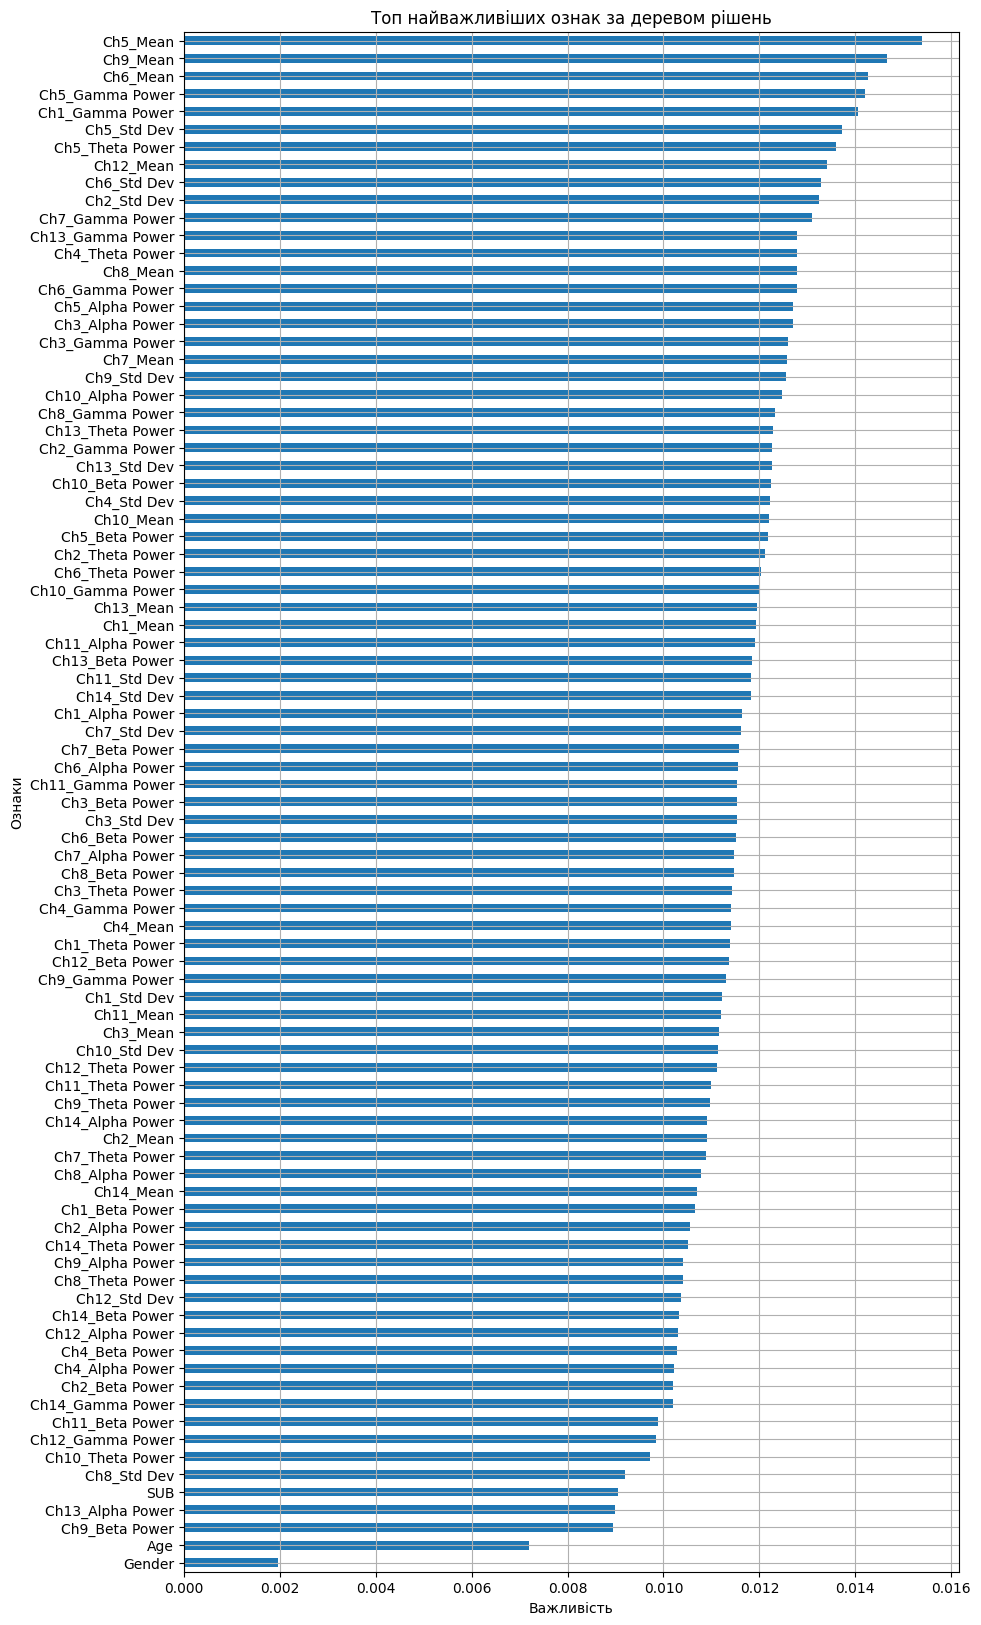

In [ ]:
model =  RandomForestClassifier(random_state=42)
model.fit(X_egg, y_valence)

feature_importances = model.feature_importances_
important_features = pd.Series(feature_importances, index=X_egg.columns)
important_features_sorted = important_features.sort_values(ascending=False)

plt.figure(figsize=(10, 20))
important_features_sorted.plot(kind='barh')
plt.title('Топ найважливіших ознак за деревом рішень')
plt.gca().invert_yaxis()
plt.xlabel('Важливість')
plt.ylabel('Ознаки')
plt.grid(True)
plt.show()


In [ ]:
фільрація по фічах на основі функції імфортант фічес

In [ ]:
на даних з віком, статю та номером людини, з порогом 0.012

In [ ]:
importance_threshold = 0.012
selected_features = important_features[important_features > importance_threshold].index.tolist()

X_selected = X_egg[selected_features]

print(f"Вибрано {len(selected_features)} ознак із {X_egg.shape[1]}")


Вибрано 32 ознак із 87


In [ ]:
print("\nVALENCE\nextratrees\n")
evaluate_model(y_test_valence, y_pred_valence)


VALENCE
extratrees

Accuracy: 0.17518248175182483
Classification Report:
               precision    recall  f1-score   support

           1     0.1818    0.2222    0.2000         9
           2     0.1667    0.1304    0.1463        23
           3     0.2326    0.3448    0.2778        29
           4     0.1951    0.3200    0.2424        25
           5     0.0000    0.0000    0.0000        21
           6     0.0000    0.0000    0.0000        12
           7     0.0000    0.0000    0.0000         7
           8     1.0000    0.1000    0.1818        10
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.1752       137
   macro avg     0.1974    0.1242    0.1165       137
weighted avg     0.1978    0.1752    0.1540       137



In [ ]:
tr_model_v = RandomForestClassifier(n_estimators=1005,
                                    criterion='entropy',
                                    max_depth=None,
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    # max_features='sqrt',
                                    max_leaf_nodes=None,
                                    #oob_score=True,
                                    random_state=50,
                                    class_weight=None
                                    )
tr_model_v.fit(X_train_valence, y_train_valence)

C:\Users\annbu\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=1005, random_state=50)

In [ ]:
спроба навчити рандом форест на даних з віком, статю та номером людини

In [ ]:
y_pred_valence = tr_model_v.predict(X_test_valence)
print("\nVALENCE\nextratrees\n")
evaluate_model(y_test_valence, y_pred_valence)


VALENCE
extratrees

Accuracy: 0.21897810218978103
Classification Report:
               precision    recall  f1-score   support

           1     0.2000    0.2222    0.2105         9
           2     0.1818    0.1739    0.1778        23
           3     0.3256    0.4828    0.3889        29
           4     0.2000    0.2800    0.2333        25
           5     0.1250    0.1429    0.1333        21
           6     0.0000    0.0000    0.0000        12
           7     0.0000    0.0000    0.0000         7
           8     0.0000    0.0000    0.0000        10
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.2190       137
   macro avg     0.1147    0.1446    0.1271       137
weighted avg     0.1682    0.2190    0.1890       137



In [ ]:
import numpy as np

# Зсув міток класу (1 → 0, 2 → 1, ..., 9 → 8)
y_train_valence_adj = y_train_valence - 1


In [ ]:
from xgboost import XGBClassifier

xgb_model_v = XGBClassifier(
    n_estimators=1005,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='multi:softprob',
    random_state=50,
    verbosity=1,
    use_label_encoder=False
)

In [ ]:
xgb_model_v.fit(X_train_valence, y_train_valence_adj)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:45:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1005, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
спроба навчити градієнтний спуск на даних з віком, статю та номером людини

In [ ]:
y_pred_valence = xgb_model_v.predict(X_test_valence)
print("\nVALENCE\nXGBClassifier\n")
evaluate_model(y_test_valence, y_pred_valence)


VALENCE
XGBClassifier

Accuracy: 0.15328467153284672
Classification Report:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     0.0714    0.2222    0.1081         9
           2     0.1471    0.2174    0.1754        23
           3     0.2500    0.2069    0.2264        29
           4     0.2308    0.2400    0.2353        25
           5     0.2222    0.0952    0.1333        21
           6     0.0000    0.0000    0.0000        12
           7     0.0000    0.0000    0.0000         7
           8     0.0000    0.0000    0.0000        10
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.1533       137
   macro avg     0.0921    0.0982    0.0879       137
weighted avg     0.1585    0.1533    0.1479       137



In [ ]:
спроба навчити ансамбль

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# моделі, які використовуються
base_learners = [
    ('extra_trees', ExtraTreesClassifier(n_estimators=200, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=200, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

meta_learner = LogisticRegression(max_iter=1000)

# сам ансамбль
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,

)

# навчання
stacking_model.fit(X_train_valence, y_train_valence)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(cv=5,
                   estimators=[('extra_trees',
                                ExtraTreesClassifier(n_estimators=200,
                                                     random_state=42)),
                               ('random_forest',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=200,
                                                           random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [ ]:
y_pred_valence = stacking_model.predict(X_test_valence)
print("\nVALENCE\nensemble of models\n")
evaluate_model(y_test_valence, y_pred_valence)


VALENCE
ensemble of models

Accuracy: 0.15328467153284672
Classification Report:
               precision    recall  f1-score   support

           1     0.0833    0.1111    0.0952         9
           2     0.0000    0.0000    0.0000        23
           3     0.1795    0.2414    0.2059        29
           4     0.1786    0.4000    0.2469        25
           5     0.1111    0.1429    0.1250        21
           6     0.0000    0.0000    0.0000        12
           7     0.0000    0.0000    0.0000         7
           8     0.0000    0.0000    0.0000        10
           9     0.0000    0.0000    0.0000         1

    accuracy                         0.1533       137
   macro avg     0.0614    0.0995    0.0748       137
weighted avg     0.0931    0.1533    0.1141       137

